In [ ]:
#This notebook uses Logistic Regression to train a supervised ML model capable of identifying numbers from pixelated, black and white images

In [26]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn import metrics
%matplotlib inline

In [27]:
digits = load_digits()

In [28]:
print("Image Data Shape", digits.data.shape)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


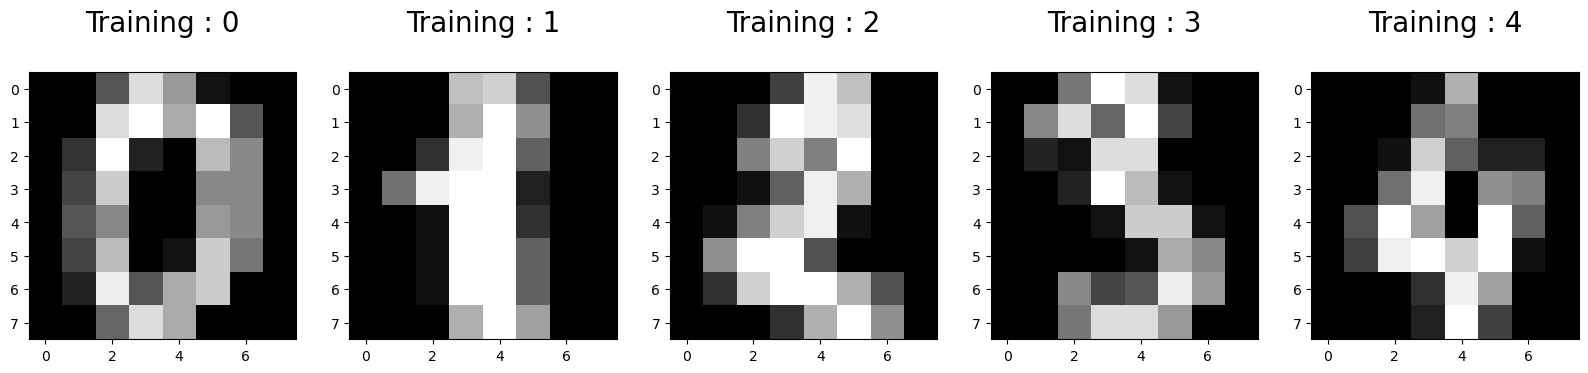

In [29]:
plt.figure(figsize=(20,4))

for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index+1)
    plt.imshow(np.reshape(image, (8,8)), cmap = plt.cm.gray)
    plt.title('Training : %i\n' % label, fontsize=20)

plt.show()

In [30]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.23, random_state=0)

In [31]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1383, 64)
(414, 64)
(1383,)
(414,)


In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
regressor = LogisticRegression()
regressor.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
print(regressor.predict(X_test[0].reshape(1, -1)))

[2]


In [35]:
regressor.predict(X_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [36]:
predictions = regressor.predict(X_test)

In [37]:
accuracy = regressor.score(X_test, y_test)
print(accuracy)

0.961352657004831


In [38]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[34  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  1  2]
 [ 0  0 40  1  0  0  0  0  0  0]
 [ 0  0  1 38  0  0  0  0  0  0]
 [ 0  0  0  0 35  0  0  1  0  0]
 [ 0  0  0  0  0 41  0  0  0  2]
 [ 0  1  0  0  0  0 49  0  0  0]
 [ 0  0  0  0  1  0  0 44  0  0]
 [ 0  3  1  0  0  0  0  0 41  1]
 [ 0  0  0  0  0  1  0  0  0 42]]


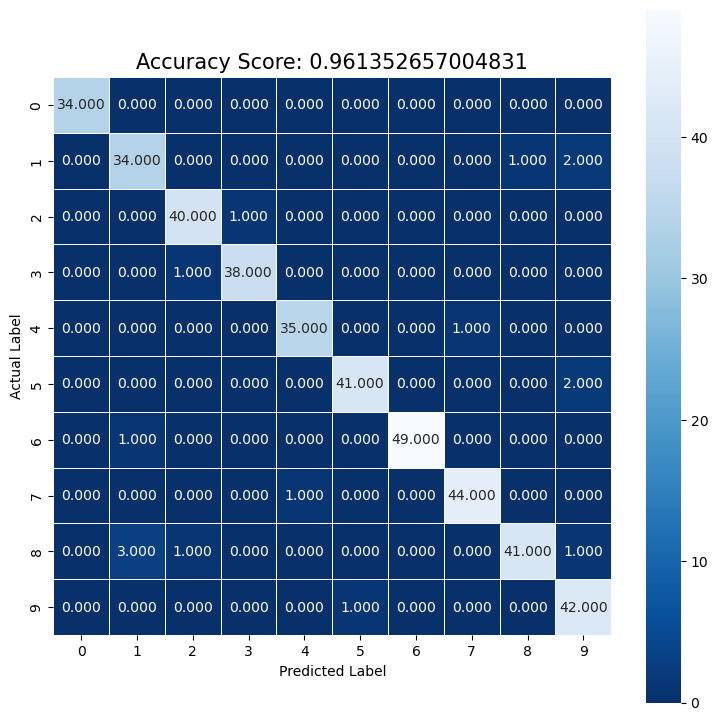

In [39]:
plt.figure(figsize=(9, 9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=0.5, square=True, cmap="Blues_r")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size=15)
plt.show()

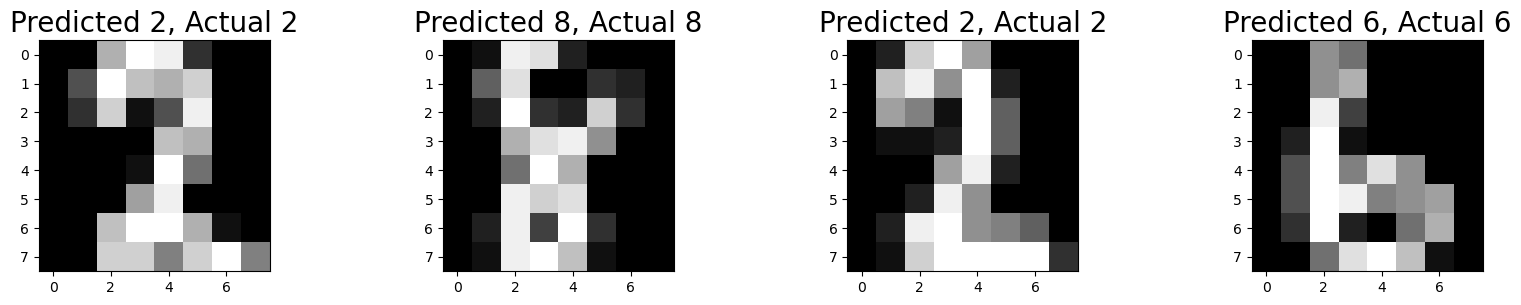

In [41]:
index = 0
classifiedIndex=[]
for predict,actual in zip(predictions, y_test):
    if predict==actual:
        classifiedIndex.append(index)
    index += 1
plt.figure(figsize=(20, 3))
for plotIndex, wrong in enumerate(classifiedIndex[0:4]):
    plt.subplot(1, 4, plotIndex+1)
    plt.imshow(np.reshape(X_test[wrong], (8,8)), cmap = plt.cm.gray)
    plt.title("Predicted {}, Actual {}".format(predictions[wrong], y_test[wrong]), fontsize=20)
plt.show()

<Figure size 2000x300 with 0 Axes>